In [3]:
import numpy as np
import pandas as pd
import warnings
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split as tt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("Mall_Customers.csv")
# print(df.head())
# print(df.isnull().sum())

m = df.iloc[:,3:].values

In [6]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init="k-means++",random_state=0)
    kmeans.fit(m)
    wcss.append(kmeans.inertia_)

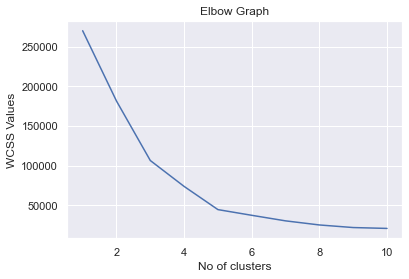

In [8]:
sns.set()
plt.plot(range(1,11),wcss)
plt.xlabel("No of clusters")
plt.ylabel("WCSS Values")
plt.title("Elbow Graph")
plt.show()

In [9]:
kmeans = KMeans(n_clusters=5,init="k-means++",random_state=0)
n = kmeans.fit_predict(m)
n

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

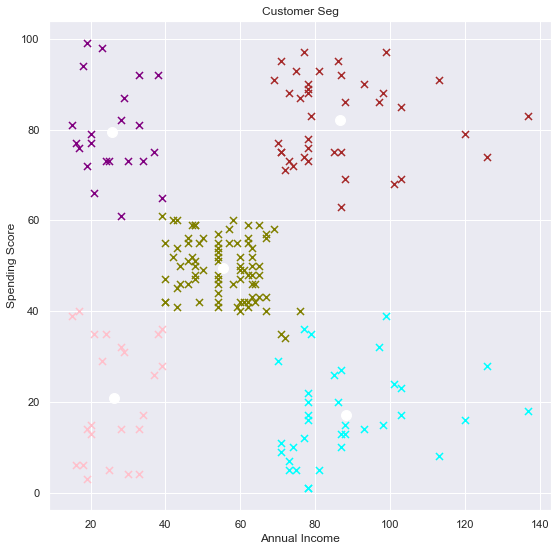

In [17]:
col = ["cyan","olive","brown","purple","pink"]
plt.figure(figsize=(9,9))
for i in range(0,5):
    plt.scatter(m[n==i,0],m[n==i,1],s=50,c=col[i],label="Cluster"+str(i+1),marker='x')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c="white",label="Centroid")
plt.title("Customer Seg")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()